# アヤメの二値分類

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。

それぞれの手法についての詳細は今の段階では扱いません。

ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


**最近傍法**

**ロジスティック回帰**

**SVM**

**決定木**

**ランダムフォレスト**


### 3.分類問題の流れ

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。

課題の後半ではこれを参考に他の手法にも適用してもらいます。


この流れについては後々より深く学び、実践していきます。

今回の課題では大まかな流れの把握を行ってください。


**練習のための準備**

練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。

こうすることで2次元の散布図を描き確認することができます。

また、問題を単純化するためアヤメの種類を2つだけ使うことにします。

分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。

それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。


## 【課題1】練習のために特徴量とカテゴリを選択


選び方は合計18通りありますが、以下の組み合わせで練習することにします。

irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


**virgicolorとvirginica**
**sepal_lengthとpetal_length**

### 《実際の問題では？》


実際の問題を解く上でも結果の可視化は有効です。

しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。

そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。

また、Week3で利用した散布図行列を使い可視化することも可能です。



In [265]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# 行と列の表示制限をなくすため
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


In [266]:
data = load_iris()

# xに特徴量、yに目的変数を代入
x, y = data.data, data.target

# 特徴量のカラム名
columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
t_columns =['Species']

# 特徴量を二つに絞る
iris_df = pd.DataFrame(x, columns=columns)
iris_df = iris_df.loc[:,['sepal_length','petal_length']] # 特徴量も二つに絞る　　　sepal_lengthとpetal_length

# 目的変数を二つに絞る
t_df = pd.DataFrame(y, columns=t_columns)
t_df = t_df.iloc[50:,0]#　アヤメの種類を二つに絞った　DataFrame （Series)　


## 【問題2】データの分析


まずはデータの分析を行いますが、これはWeek3の課題1で行いました。

その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。

sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


**ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。**



《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。



今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。


前処理

データに加工をしていきます

----------sepal_lengthの箱ヒゲ図


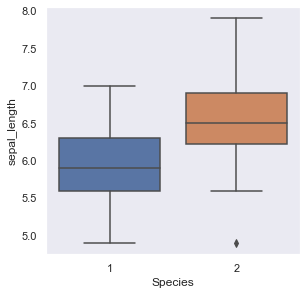

----------petal_lengthの箱ヒゲ図


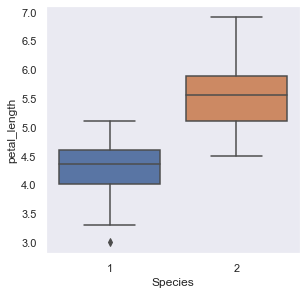

----------sepal_lengthのバイオリン図


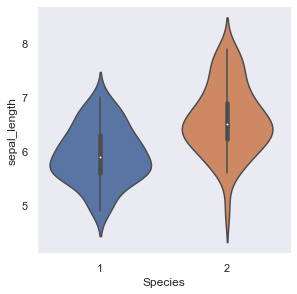

----------petal_lengthのバイオリン図


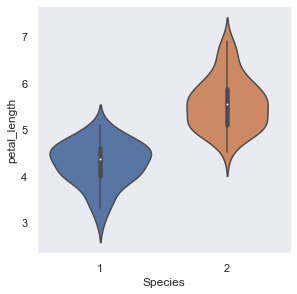

In [267]:
# 回答

# 箱ひげ図とバイオリン図を表示

# sepal_lengthの箱ヒゲ図
print('----------sepal_lengthの箱ヒゲ図')
sns.set(style="dark") 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=t_df, y=iris_df["sepal_length"] )
plt.xlabel("Species") 
plt.ylabel("sepal_length")
plt.show()

print('----------petal_lengthの箱ヒゲ図')
# petal_lengthの箱ヒゲ図
sns.set(style="dark") 
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.boxplot(x=t_df, y=iris_df["petal_length"] )
plt.xlabel("Species") 
plt.ylabel("petal_length")
plt.show()

# sepal_lengthのバイオリン図
print('----------sepal_lengthのバイオリン図')
sns.set(style="dark") 
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.violinplot(x=t_df, y=iris_df["sepal_length"] )
plt.xlabel("Species") 
plt.ylabel("sepal_length")
plt.show()

# petal_lengthのバイオリン図
print('----------petal_lengthのバイオリン図')
sns.set(style="dark") 
plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.violinplot(x=t_df, y=iris_df["petal_length"] )
plt.xlabel("Species") 
plt.ylabel("petal_length")
plt.show()



## 【問題3】前処理・訓練データと検証データの分割


前処理の一貫として、訓練データと検証データの分割を行います。

今回は訓練データ75%、検証データ25%として分割してください。


**scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。**



sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


**《注意点》**


データの分析まではPandasのDataFrameを使用してきました。

しかし、scikit-learnはNumPyのndarrayを想定して作られています。

そのため、この段階でndarrayへの変換を行いましょう。

特徴量（説明変数）をX、正解（目的変数）をy(t)というndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。

その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。

この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。

学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [385]:
# DataFrameからNumPyのndarrayに変換してXとtに格納
X =iris_df.values #特徴量
t = t_df.values #目的変数

# 行数をtarget(t_df)と合わせるためにreshape(150,2)→(100,3)
X = X.reshape(100, 3)

# 訓練(学習用)データ75%、検証(テスト)データ25%として分割
# (random_state=0で分割後の結果が毎回変わらないように指定する)
x_train, x_test, t_train, t_test = train_test_split(X, t, test_size=0.25, random_state=0)

print(f'reshap後です{x_train.shape, x_test.shape, t_train.shape, t_test.shape}')
# 分割完了　以下len()で分割されたか数の確認
print(f"特徴量の訓練用データの数は{(len(x_train))}です")
print(f"特徴量の検証用データの数は{len(x_test)}です")

print(f"目的変数の訓練用データの数は{(len(t_train))}です")
print(f"目的変数の検証用データの数は{len(t_test)}です")

reshap後です((75, 3), (25, 3), (75,), (25,))
特徴量の訓練用データの数は75です
特徴量の検証用データの数は25です
目的変数の訓練用データの数は75です
目的変数の検証用データの数は25です


## 【問題4】前処理・標準化

分類精度をあげるための加工を行います。

手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


**《注意点》**


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。

検証データは学習の段階には存在しない未知のデータの代わりなので、

標準化のための平均や標準偏差の計算に使ってはいけません。

また、今回は分類問題なので、ラベルについては標準化させる必要はありません。


**《実際の問題での前処理は？》**


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。

分析を行いながら、さまざまな加工が必要になってきます。

例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。

外れ値の確認や、複数のデータセットの整理などもあります。

In [380]:
scaler = StandardScaler()
# 標準化は訓練用のデータでfitを行う
# 特徴量
print(scaler.fit(x_train))
print(scaler.mean_)

# 目的変数
# print(scaler.fit_transform(t_train))
# print(scaler.mean_)


# 訓練用、検証用双方のデータにtransformを行います。（標準化の実行）
# 特徴量
print(scaler.transform(x_train))
print(scaler.transform(x_test))

# 目的変数
# print(scaler.transform(t_train))
# print(scaler.transform(t_test))


StandardScaler()
[4.86266667 4.85866667 4.792     ]
[[ 0.8102822   0.02608162  0.75370969]
 [ 0.02104629 -2.11934199  0.35034824]
 [ 0.30291626  0.65708856  0.17747904]
 [ 0.8102822   0.02608162  1.09944808]
 [ 0.52841223  0.15228301  0.92657889]
 [ 0.35929025 -0.28942185  0.75370969]
 [ 1.14852616  0.53088718  0.46559437]
 [ 1.59951811  0.78328995  0.86895582]
 [ 1.26127415  0.65708856  0.86895582]
 [-0.0353277   1.16189412  0.11985598]
 [-2.00841748 -0.22632116 -2.01219744]
 [ 0.19016827 -2.11934199  0.23510211]
 [ 0.30291626 -0.22632116  0.69608663]
 [-0.37357166  0.53088718 -0.34112855]
 [ 0.86665619  0.2784844   1.15707115]
 [-1.95204348 -0.10011977 -2.01219744]
 [-0.14807569  0.59398787 -0.45637468]
 [ 0.69753421 -0.10011977  0.46559437]
 [-0.37357166  0.72018926 -0.45637468]
 [-0.14807569 -2.18244269  0.11985598]
 [-2.17753946  0.15228301 -1.78170518]
 [-1.8392955   0.08918231 -1.83932824]
 [ 0.07742028 -0.8573281   0.63846356]
 [ 0.02104629 -0.98352949  1.04182502]
 [-1.8956694

## 【問題5】学習と推定

最近傍法（k-nearest neighbors, k-nn）で学習を行います。

scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。

ここで入力するのは訓練データです。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。

最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。

デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。



In [419]:

def k_neigh_func(num):
    """　任意の近傍オブジェクト数を引数に渡し、最近傍法で予測値を返す関数
    Parameter
    ----------
    num: int64
        近傍オブジェクト数
    
    Return
    ----------
    score: int64
        予測値
    """

    # 最近傍法（k-nearest neighbors, k-nn）で学習を行います。
    neigh = KNeighborsClassifier(n_neighbors=num)
    # k-nnの学習を行ってください。ここで入力するのは訓練データです。
    neigh.fit(x_train, t_train) #k最近傍分類器を適合

    #予測（推定）
    a_pred = neigh.predict(x_test)

    # 評価（平均精度）
    score = neigh.score(x_test, t_test)

    return score


# ３パターンのn_neighborsで値を確認する
score_5nn = k_neigh_func(5)
score_3nn = k_neigh_func(3)
score_1nn = k_neigh_func(1)

# 3パターンの予測値のを出力
print(f'5-nnの予測値の精度は{score_5nn}です')
print(f'3-nnの予測値の精度は{score_3nn}です')
print(f'1-nnの予測値の精度は{score_1nn}です')

print(f"予測値は{a_pred}") #検証用データ（目標変数）と比較する！

# 決定木
print(f'学習用　train score : {model.score(x_train, t_train)}')
print(f'テスト用　test score : {model.score(x_test, t_test)}')

# a_pred.shape
print(type(score_5nn))
print(score_5nn.shape)

5-nnの予測値の精度は0.92です
3-nnの予測値の精度は0.88です
1-nnの予測値の精度は0.84です
予測値は[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1]
学習用　train score : 1.0
テスト用　test score : 0.8
<class 'numpy.float64'>
()


## 【問題6】評価


検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には
**Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値**
があります。

それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


**1. scikit-learnを使い4種類の指標を計算する**

**2. 混同行列をscikit-learnを使い表示する**

**3. 4種類の指標値の意味について簡単に調査して文章でまとめる**

※公式のドキュメントはDIVERに記載

In [272]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 回答
# 1.scikit leanを使い４種類の指標を計算する
# ★正解率
print(f'検証用データと予測値の正解率は{accuracy_score(t_test, a_pred)}です')

# ★Precision（適合率）、　精度ともいう
print(f'検証用データと予測値の適合率は{precision_score(t_test, a_pred)}です')

# ★Recall（再現率）　　感度、検出率、真陽性率ともいう
print(f'検証用データと予測値の再現率は{recall_score(t_test, a_pred)}です')

# ★F値　適合率、再現率をバランスよく持ち合わせているか表す指標
print(f'検証用データと予測値の正解率は{f1_score(t_test, a_pred)}です')

検証用データと予測値の正解率は0.92です
検証用データと予測値の適合率は0.9230769230769231です
検証用データと予測値の再現率は0.9230769230769231です
検証用データと予測値の正解率は0.9230769230769231です


In [273]:
# 2. 混同行列をscikit-learnを使い表示する
from sklearn.metrics import confusion_matrix

print(confusion_matrix(t_test, a_pred))
# ★★★混合行列の見方★★★
# 実際に合っている　｜　◯と判断　｜　×と判断
# 実際に間違ってる　｜◯と判断　｜　×と判断

[[12  1]
 [ 1 11]]


In [274]:
# 3. 4種類の指標値の意味について簡単に調査して文章でまとめる
print('accuracy（正解率）')
print('Precision（適合率）、　精度ともいう')
print('Recall（再現率）　　感度、検出率、真陽性率ともいう')
print('F値　適合率、再現率をバランスよく持ち合わせているか表す指標')

accuracy（正解率）
Precision（適合率）、　精度ともいう
Recall（再現率）　　感度、検出率、真陽性率ともいう
F値　適合率、再現率をバランスよく持ち合わせているか表す指標


## 【問題7】可視化


評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。

以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。

Xとyには訓練データまたは検証データを与えます。

In [436]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 問題の雛形の関数
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
# print(type(x_train))
# print(type(x_test))
# print(type(a_pred))
# t_train.shape


# 関数が動きません
print(decision_region(x_train, t_train, knc))




ValueError: query data dimension must match training data dimension

## 【問題8】他の手法の学習

以下のすべての手法について**学習・推定・評価・可視化**を行ってください。

そして、**指標値を１つの表にまとめてください。**

その表と決定領域を利用して結果を簡単に考察してください。

どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


**1. 最近傍法**

**2. ロジスティック回帰**

**3. SVM**

**4. 決定木**

**5. ランダムフォレスト**


公式ドキュメントへのリンクは以下です。

それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation

sklearn.svm.SVC — scikit-learn 0.21.3 documentation

sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation

sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

《実際の問題では？》


ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

In [423]:
#
# 1. 最近傍法
#
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)

knc.fit(x_train, t_train)
# 予測　
# 評価 R^2
score = knc.score(x_test, t_test)

# 学習の結果
print(f'1. 最近傍法　学習用　train score: {knc.score(x_train, t_train)}')
print(f'1. 最近傍法テスト用　test score: {knc.score(x_test, t_test)}')
# print(model.predict(x_test))


label_pred_knc = knc.predict(x_test)
print(f'最近傍法でアヤメの種類を予測{label_pred_knc}')

1. 最近傍法　学習用　train score: 0.8666666666666667
1. 最近傍法テスト用　test score: 0.92
最近傍法でアヤメの種類を予測[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1]


In [422]:
# 
# 2. ロジスティック回帰
# 

from sklearn.linear_model import LogisticRegression
 
#ロジスティック回帰のインスタンスを作成
LogReg = LogisticRegression(random_state=0)
 
#ロジスティック回帰でデータを学習
LogReg.fit(x_train, t_train)
 
#ロジスティック回帰でアヤメの種類を予測
label_pred_LogReg = LogReg.predict(x_test)
# print(label_pred_LogReg)

# 学習の結果
print(f'2. ロジスティック回帰 学習用　train score: {model.score(x_train, t_train)}')
print(f'2. ロジスティック回帰 テスト用　test score: {model.score(x_test, t_test)}')

label_pred_LogReg = model.predict(x_test)

print(f'ロジスティック回帰でアヤメの種類を予測{label_pred_LogReg}')
 

2. ロジスティック回帰 学習用　train score: 1.0
2. ロジスティック回帰 テスト用　test score: 0.8
ロジスティック回帰でアヤメの種類を予測[1 2 1 2 2 2 1 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1]


In [342]:
# 
#  3. SVM
# 

#必要なモジュールをインポート
from sklearn import svm
 
#LinearSVMのインスタンスを作成
Linsvc = svm.LinearSVC(random_state=0, max_iter=3000)
 
#LinearSVMでデータを学習
Linsvc.fit(x_train, t_train)

# print(decision_region(t_train,t_test,Linsvc))

# 学習の結果
print(f'3. SVM　学習用　train score: {Linsvc.score(x_train, t_train)}')
print(f'3. SVM テスト用　test score: {Linsvc.score(x_test, t_test)}')
# print(model.predict(x_test))


label_pred_Linsvc = Linsvc.predict(x_test)
print(f'SVMでアヤメの種類を予測{label_pred_Linsvc}')

3. SVM　学習用　train score: 0.84
3. SVM テスト用　test score: 0.76
SVMでアヤメの種類を予測[1 2 1 2 2 2 1 2 1 2 1 2 2 1 1 1 1 1 2 1 2 1 1 2 2]


/Users/summitlama/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [343]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # 決定木に必要

# 
# 4. 決定木
# 

# LinearRegressionを定義
from sklearn.linear_model import LinearRegression

model = DecisionTreeClassifier(random_state=0)
# 学習データを適合
model.fit(x_train, t_train)

# 学習の結果
print(f'4. 決定木 学習用　train score: {model.score(x_train, t_train)}')
print(f'4. 決定木 テスト用　test score: {model.score(x_test, t_test)}')

label_pred_tree = model.predict(x_test)

print(f'決定木でアヤメの種類を予測{label_pred_tree}')

4. 決定木 学習用　train score: 1.0
4. 決定木 テスト用　test score: 0.8
決定木でアヤメの種類を予測[1 2 1 2 2 2 1 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1]


In [378]:
# 
#  5.ランダムフォレスト
# 

import datetime#元データの日付処理のためにインポート
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

RandomFor = RandomForestClassifier(random_state=0)
# 学習データを適合
RandomFor.fit(x_train, t_train)

# 学習の結果
print(f'5. ランダムフォレスト 学習用　train score: {RandomFor.score(x_train, t_train)}')
print(f'5. ランダムフォレスト テスト用　test score: {RandomFor.score(x_test, t_test)}')

label_pred_RandomFor = RandomFor.predict(x_test)

print(f'ランダムフォレストでアヤメの種類を予測{label_pred_RandomFor}')


# print(decision_region(x_train, t_train, label_pred_RandomFor))
print(x_train.shape)
# q = x_train.reshape([75, 2])
# q.shape
# t_train.shape
# label_pred_RandomFor.shape

5. ランダムフォレスト 学習用　train score: 1.0
5. ランダムフォレスト テスト用　test score: 0.84
ランダムフォレストでアヤメの種類を予測[1 2 1 2 2 2 1 2 1 2 2 2 2 1 1 1 1 1 2 1 2 1 1 2 1]
(75, 3)


In [412]:
# 五種類の結果をグラフにまとめる

aa = np.array([label_pred_knc, label_pred_LogReg, label_pred_Linsvc, label_pred_tree, label_pred_RandomFor])

df = pd.DataFrame(aa, index=["Knein","LogisticRegression","svm","DecisionTree","RandomForest"])

display(df)


# 考察
print('考察 1. ロジスティック回帰と決定木は同じ結果となった')
print('考察 2. svmとランダムフォレストの結果もほぼ同じ')
print('考察 3. 最近傍法は他の手法と比べて違いが大きく感じる')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Knein,1,2,1,2,2,2,1,2,2,2,2,2,2,1,1,1,1,1,1,1,2,1,1,2,2
LogisticRegression,1,2,1,2,2,2,1,2,1,2,2,1,2,2,1,1,1,1,1,1,1,1,2,2,1
svm,1,2,1,2,2,2,1,2,1,2,1,2,2,1,1,1,1,1,2,1,2,1,1,2,2
DecisionTree,1,2,1,2,2,2,1,2,1,2,2,1,2,2,1,1,1,1,1,1,1,1,2,2,1
RandomForest,1,2,1,2,2,2,1,2,1,2,2,2,2,1,1,1,1,1,2,1,2,1,1,2,1


考察 1. ロジスティック回帰と決定木は同じ結果となった
考察 2. svmとランダムフォレストの結果もほぼ同じ
考察 3. 最近傍法は他の手法と比べて違いが大きく感じる
